In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("w12-data.tbl", delim_whitespace = True)
ldf = np.log(df)
Q=8



# Question 1

Two approaches are shown, one using the code from the solutions of HW6 and one using sklearn and my own code. 

In [3]:
dists = np.zeros(100)
for i in range(100): 
    #Sklearn fitting of centroids 
    kmeans = KMeans(n_clusters=8, init = 'k-means++', random_state = i)
    kmeans = kmeans.fit(ldf.values)
    labels = kmeans.predict(ldf.values)
    centroids = kmeans.cluster_centers_
    
    #Make 2d
    assigned = labels[:,None]
    groupedmatrix = np.append(ldf.values, assigned,1)

    sortedmatrix = groupedmatrix[groupedmatrix[:,2001].argsort()]

    pm = pd.DataFrame(sortedmatrix)
    pm.rename(columns = {list(pm)[2001]:'c'}, inplace=True)
    
    
    
    #Grouping
    group0 = pm.loc[pm["c"] == 0]
    group1 = pm.loc[pm['c'] == 1]
    group2 = pm.loc[pm['c'] == 2]
    group3 = pm.loc[pm['c'] == 3]
    group4 = pm.loc[pm['c'] == 4]
    group5 = pm.loc[pm['c'] == 5]
    group6 = pm.loc[pm['c'] == 6]
    group7 = pm.loc[pm['c'] == 7]

    group0 = group0.drop('c', 1)
    group1 = group1.drop('c', 1)
    group2 = group2.drop('c', 1)
    group3 = group3.drop('c', 1)
    group4 = group4.drop('c', 1)
    group5 = group5.drop('c', 1)
    group6 = group6.drop('c', 1)
    group7 = group7.drop('c', 1)

    #Distances
    dists0 = np.sum(euclidean_distances(centroids[[0]],group0 ))
    dists1 = np.sum(euclidean_distances(centroids[[1]],group1 ))
    dists2 = np.sum(euclidean_distances(centroids[[2]],group2 ))
    dists3 = np.sum(euclidean_distances(centroids[[3]],group3 ))
    dists4 = np.sum(euclidean_distances(centroids[[4]],group4 ))
    dists5 = np.sum(euclidean_distances(centroids[[5]],group5 ))
    dists6 = np.sum(euclidean_distances(centroids[[6]],group6 ))
    dists7 = np.sum(euclidean_distances(centroids[[7]],group7 ))
    
    dists[i] = np.sum((dists0, dists1, dists2, dists3, dists4, dists5, dists6, dists7))



best_state = i
a = np.min(dists)

print(a)
print(best_state)

4170.234050811649
99


In [4]:
#Taken from HW solutions 
def sample_component(X):
    N, G   = np.shape(X)
    dmax   = np.amax(X, axis=0)
    dmin   = np.amin(X, axis=0)
    mu     = np.zeros(G)
    for g in range(G):
        mu[g] = np.exp(np.random.uniform(np.log(dmin[g]), np.log(dmax[g])))
    return mu
def euclidean_dist(v1, v2):
    d = 0.
    for i in range(len(v1)):
        d += (v1[i] - v2[i])**2
    return np.sqrt(d)

def closest_centroid(x, centroids):
    K, dim = np.shape(centroids)
    best_k = 0
    best_dist = euclidean_dist(x, centroids[0])
    for k in range(1,K):
        dist = euclidean_dist(x, centroids[k])
        if dist < best_dist:
            best_k    = k
            best_dist = dist
    return best_k, best_dist
def assign_kmeans(X, centroids):
    K, dim      = np.shape(centroids)
    N           = len(X)
    assignments = np.zeros(N).astype(int)
    totdist     = 0
    for i,x in enumerate(X):
        assignments[i], di = closest_centroid(x, centroids)
        totdist += di
    return assignments, totdist
def update_kmeans(X, assignments, K):
    N, G    = np.shape(X)              
    
    centroids = np.zeros((K,G))        
    counts    = np.zeros(K)
    for i in range(N):
        counts[assignments[i]] += 1
        for g in range(G):
            centroids[assignments[i], g] += X[i][g]

    for k in range(K):
        if counts[k] > 0:                                      
            centroids[k] = np.divide(centroids[k], counts[k])  
        else:                                                  
            centroids[k] = sample_component(X)               

    Z = np.sum(counts)
    counts = np.divide(counts, Z)
    return centroids, counts
def diff_assignments(a1, a2):

    N     = len(a1)
    ndiff = 0
    for i in range(N):
        if a1[i] != a2[i]: 
            ndiff += 1
    return ndiff
def kmeans(X, K, T=np.zeros(0)):
    N, G = np.shape(X)
    
    if len(T) > 0:
        centroids, qp = update_kmeans(X, T, K)
    else:
        centroids = np.zeros((K,G))
        for k in range(K):
            centroids[k] = sample_component(X)
    
    iteration = 0
    while True:
        assignments, totdist = assign_kmeans(X, centroids)
        if iteration >= 10:
            break
        centroids, kp   = update_kmeans(X, assignments, K)
        old_assignments = assignments
        iteration      += 1

    kp = np.zeros(Q)
    for i in range(N):
        kp[assignments[i]] += 1
    kp = np.divide(kp, N)

    return kp, centroids, assignments, totdist




In [ ]:
#for run in range(20):
    #np.random.seed(run)
    #kp, centroids, assignments, totdist = kmeans(ldf.values, K=8)
    #print("RNG seed {0:2d}:  totdist {1:12.1f}".format(run, totdist))

In [5]:
np.random.seed(15)
kp, centroids, assignments, totdist = kmeans(ldf.values, K=8)
print(totdist)

4174.407157360587


# Question 2

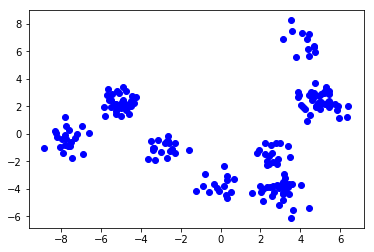

In [6]:
X_std = (ldf - ldf.mean())

#SVD
U, S, Wt = np.linalg.svd(X_std, full_matrices = False)

#Projection data
Y2 = U * S 

#First 2 PC
plt.scatter(Y2[:,0],Y2[:,1], c = 'blue')


Watson was right to expect 8 clusters, which we can clearly see above. 

(array([ 89., 109.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([1.27392242e-26, 2.07921313e+00, 4.15842626e+00, 6.23763939e+00,
        8.31685253e+00, 1.03960657e+01, 1.24752788e+01, 1.45544919e+01,
        1.66337051e+01, 1.87129182e+01, 2.07921313e+01]),
 <a list of 10 Patch objects>)

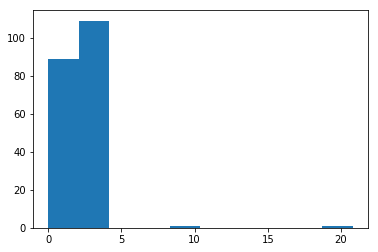

In [7]:
eigenvals = S**2 / (200-1)
plt.hist(eigenvals)

(array([20., 26., 27., 26., 26., 20., 18., 16., 12.,  8.]),
 array([1.075 , 1.3534, 1.6318, 1.9102, 2.1886, 2.467 , 2.7454, 3.0238,
        3.3022, 3.5806, 3.859 ]),
 <a list of 10 Patch objects>)

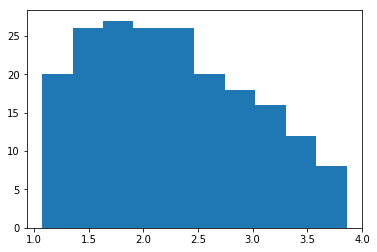

In [8]:
w12eigen = pd.read_csv("w12-eigen.tbl", delim_whitespace = True, header=-1, index_col = 0)
v = w12eigen.values
plt.hist(v)

We can see there are only two high eigenvalues which correspond to the first and second principal component on the first graph. These eigenvalues are significantly larger than all of the others, implying the first and second principal components capture most of the variance. Thus it is unlikely that another graphical display of other principal components would show additional clusters. We can reference the negative control data to see that eigenvalues in a dataset with no correlation could take values from around 1 to 4, but the two selected in the first boxplot have values around 10 and 20, which are clearly not due to chance. 

(47, 2)

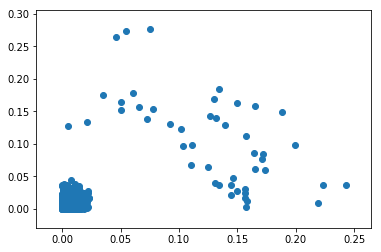

In [9]:
#Eigenvectors w/ PC1, PC2
plt.scatter(np.abs(Wt[0]), np.abs(Wt[1]))
#47 - only look at these 

gc = pd.DataFrame(np.vstack((np.abs(Wt[0]), np.abs(Wt[1]))).T, columns=['a', 'b'])


gc2 = gc[(gc['a']>.1) | (gc['b']>.1)]

gc2.shape



47 genes appear to influence cell type identity with a cutoff of .1. 

# Question 3

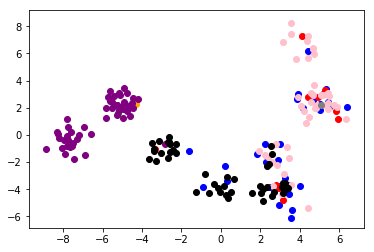

In [10]:
M = np.vstack((Y2[:,0], Y2[:,1], assignments)).T

pm = pd.DataFrame(M, columns=['a', 'b', 'c'])

group0 = pm.loc[pm['c'] == 0]
group1 = pm.loc[pm['c'] == 1]
group2 = pm.loc[pm['c'] == 2]
group3 = pm.loc[pm['c'] == 3]
group4 = pm.loc[pm['c'] == 4]
group5 = pm.loc[pm['c'] == 5]
group6 = pm.loc[pm['c'] == 6]
group7 = pm.loc[pm['c'] == 7]


group0 = group0[['a','b']].values
group1 = group1[['a','b']].values
group2 = group2[['a','b']].values
group3 = group3[['a','b']].values
group4 = group4[['a','b']].values
group5 = group5[['a','b']].values
group6 = group6[['a','b']].values
group7 = group7[['a','b']].values



plt.scatter(group0[:,0],group0[:,1], c = 'blue')
plt.scatter(group1[:,0],group1[:,1], c = 'red')
plt.scatter(group2[:,0],group2[:,1], c = 'green')
plt.scatter(group3[:,0],group3[:,1], c = 'orange')
plt.scatter(group4[:,0],group4[:,1], c = 'pink')
plt.scatter(group5[:,0],group5[:,1], c = 'purple')
plt.scatter(group6[:,0],group6[:,1], c = 'black')
plt.scatter(group7[:,0],group7[:,1], c = 'grey')

Kmeans struggles because of the noise in the data. Noisy data points are considered in the calculation of clusters which causes bad grouping results. Looking at just the first two principal components reduces the noise, which allows kmeans to function properly. 

In [11]:
#Projected data
kdata = np.vstack((Y2[:,0], Y2[:,1])).T



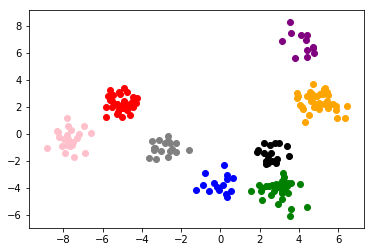

In [12]:
#Kmeans on projected data
kmeans = KMeans(n_clusters=8, init = 'random', n_init = 100)
kmeans = kmeans.fit(kdata)
labels_new = kmeans.predict(kdata)
centroids_new = kmeans.cluster_centers_

M = np.vstack((Y2[:,0], Y2[:,1], labels_new)).T

pm = pd.DataFrame(M, columns=['a', 'b', 'c'])

group0 = pm.loc[pm['c'] == 0]
group1 = pm.loc[pm['c'] == 1]
group2 = pm.loc[pm['c'] == 2]
group3 = pm.loc[pm['c'] == 3]
group4 = pm.loc[pm['c'] == 4]
group5 = pm.loc[pm['c'] == 5]
group6 = pm.loc[pm['c'] == 6]
group7 = pm.loc[pm['c'] == 7]


group0 = group0[['a','b']].values
group1 = group1[['a','b']].values
group2 = group2[['a','b']].values
group3 = group3[['a','b']].values
group4 = group4[['a','b']].values
group5 = group5[['a','b']].values
group6 = group6[['a','b']].values
group7 = group7[['a','b']].values



plt.scatter(group0[:,0],group0[:,1], c = 'blue')
plt.scatter(group1[:,0],group1[:,1], c = 'red')
plt.scatter(group2[:,0],group2[:,1], c = 'green')
plt.scatter(group3[:,0],group3[:,1], c = 'orange')
plt.scatter(group4[:,0],group4[:,1], c = 'pink')
plt.scatter(group5[:,0],group5[:,1], c = 'purple')
plt.scatter(group6[:,0],group6[:,1], c = 'black')
plt.scatter(group7[:,0],group7[:,1], c = 'grey')



# Question 4

In [13]:
#Recall Y2 = U * S 
#Reconstruct original data
US2 = np.vstack((Y2[:,0],Y2[:,1]))
Wnew = np.vstack((Wt[0], Wt[1])).T
print(US2.shape)
print(Wnew.shape)
Xstarq = (Wnew @ US2).T
print(Xstarq.shape)

#Un-center 
Xq = Xstarq + Xstarq.mean()



(2, 200)
(2001, 2)
(200, 2001)


In [14]:
#Sort in array by cluster identity 
assigned = labels_new[:,None]
groupedmatrix = np.append(Xq, assigned,1)

sortedmatrix = groupedmatrix[groupedmatrix[:,2001].argsort()]
b = np.delete(sortedmatrix, -1, axis=1)




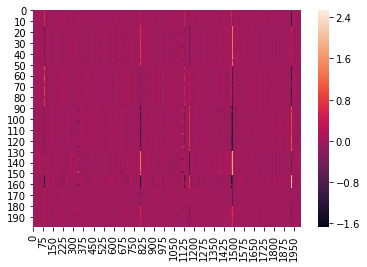

In [15]:
import seaborn as sns
fig = sns.heatmap(b)#[:,:47])

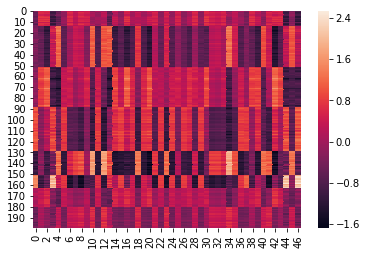

In [16]:
fig = sns.heatmap(b[:,gc2.index])



Using the 47 relevant genes' input (eigenvectors), we can see 8 different colored vertical bars on the heatmap as expected. This is easier to visualize as the noise has been reduced. 